In [9]:
import pandas as pd
import numpy as np 

In [10]:
data = pd.read_csv('Reviews.csv')

# Data analysis and visulazation

data.head()

In [4]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [28]:
data['helpful%']= np.where(data["HelpfulnessDenominator"]>0, data["HelpfulnessNumerator"]/data["HelpfulnessDenominator"],-1)

In [6]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [7]:
data['helpful%'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [29]:
data['percent%'] = pd.cut(data['helpful%'], bins=[-1, 0,0.2,0.4,0.6,0.8,1], labels=['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpful%,percent%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
data.groupby(['Score', 'percent%']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score percent%                                                                 
1     Empty       8060       8060    8060         8060                  8060   
      0-20%       2338       2338    2338         2338                  2338   
      20-40%      4649       4649    4649         4649                  4649   
      40-60%      6586       6586    6586         6586                  6586   
      60-80%      5838       5838    5838         5836                  5838   
      80-100%    12531      12531   12531        12531                 12531   
2     Empty       4234       4234    4234         4234                  4234   
      0-20%        762        762     762          762                   762   
      20-40%      1618       1618    1618         1618                  1618   
      40-60%      3051       3051    3051         3051                  3051   
      60-80%      2486       2486    2486         2486                  2486   
      80-100%     7014       7014    7014         7014                  7014   
3     Empty       5062       5062    5062         5062                  5062   
      0-20%        474        474     474          474                   474   
      20-40%      1506       1506    1506         1506                  1506   
      40-60%      3384       3384    3384         3384                  3384   
      60-80%      2754       2754    2754         2754                  2754   
      80-100%    11037      11037   11037        11037                 11037   
4     Empty       4780       4780    4780         4780                  4780   
      0-20%        116        116     116          116                   116   
      20-40%       909        909     909          909                   909   
      40-60%      3185       3185    3185         3185                  3185   
      60-80%      2941       2941    2941         2941                  2941   
      80-100%    26707      26707   26707        26707                 26707   
5     Empty      11638      11638   11638        11638                 11638   
      0-20%        432        432     432          432                   432   
      20-40%      2275       2275    2275         2275                  2275   
      40-60%     10312      10312   10312        10312                 10312   
      60-80%     11060      11060   11060        11060                 11060   
      80-100%   140661     140661  140661       140659                140661   

                HelpfulnessDenominator    Time  Summary    Text  helpful%  
Score percent%                                                             
1     Empty                       8060    8060     8060    8060      8060  
      0-20%                       2338    2338     2338    2338      2338  
      20-40%                      4649    4649     4649    4649      4649  
      40-60%                      6586    6586     6586    6586      6586  
      60-80%                      5838    5838     5838    5838      5838  
      80-100%                    12531   12531    12531   12531     12531  
2     Empty                       4234    4234     4234    4234      4234  
      0-20%                        762     762      737     762       762  
      20-40%                      1618    1618     1618    1618      1618  
      40-60%                      3051    3051     3051    3051      3051  
      60-80%                      2486    2486     2486    2486      2486  
      80-100%                     7014    7014     7014    7014      7014  
3     Empty                       5062    5062     5062    5062      5062  
      0-20%                        474     474      474     474       474  
      20-40%                      1506    1506     1506    1506      1506  
      40-60%                      3384    3384     3384    3384      3384  
      60-80%                      2754    2754     2754    2754      2754  
      80-100%  

In [30]:
df_p = data.groupby(['Score', 'percent%']).agg({'Id':'count'}).reset_index()

In [12]:
pivot = df_p.pivot(index='percent%', columns='Score')

In [13]:
import seaborn as sns

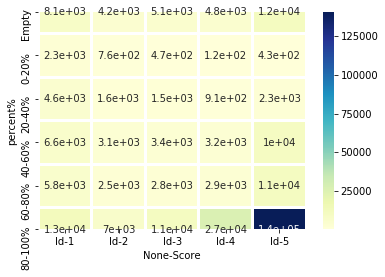

In [62]:
sns.heatmap(pivot,annot=True,cmap='YlGnBu' , linewidths=2)

In [15]:
data['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [20]:
df = data[data['Score']!=3]

In [21]:
df['Score'].unique()

array([5, 1, 4, 2], dtype=int64)

# extracting my independent and dependent variable 

In [20]:
X = df["Text"]

In [18]:

y_dict= {1:0,2:0,4:1,5:1}

In [22]:
y = df['Score'].map(y_dict)

In [22]:
y

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525814, dtype: int64

# converting my independent varible into a vector to feed the ML model

In [23]:
from sklearn.feature_extraction.text import CountVectorizer 

In [27]:
c = CountVectorizer(stop_words= 'english')

In [36]:
c.get_feature_names()

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [28]:
x_a = c.fit_transform(X)

In [30]:
x_a

<525814x114969 sparse matrix of type '<class 'numpy.int64'>'
	with 15966096 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_text,y_train,y_test = train_test_split(x_a, y)

In [32]:
x_train

<394360x114969 sparse matrix of type '<class 'numpy.int64'>'
	with 11983242 stored elements in Compressed Sparse Row format>


# importing my ML model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log = LogisticRegression()

In [35]:
model = log.fit(x_train,y_train)

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sam\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
model.score(x_text,y_test)

0.939963789614618

In [42]:
value = model.coef_.tolist()[0]

In [43]:
words = c.get_feature_names()

In [45]:
dfheads = pd.DataFrame({'word':words, 'coefficient':value})

In [47]:
dfheads = dfheads.sort_values(['coefficient','word'], ascending=False)

# extracting the top 20 negative words

In [50]:
dfheads.tail(20)

,word,coefficient
111607,weruvia,-2.266090
107699,unimpressed,-2.304556
102845,terrible,-2.305177
106894,unappealing,-2.350925
88945,ripoff,-2.360683
37563,disappointment,-2.381504
67898,mediocre,-2.404138
88351,returnable,-2.464879
35220,defeats,-2.501906
56229,ick,-2.581611


# automating my NLP_model

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [95]:
def nlp_model(x,y,nlp_model,model, coef_show = 1):
    x_a = nlp_model.fit_transform(X)
    print('features:{}'.format(x_a.shape[1]))
    x_train,x_test,y_train,y_test = train_test_split(x_a, y)
    model = model.fit(x_train,y_train)
    acc = model.score(x_test,y_test)
    print('your model accuracy',acc,'\n')
    predictions = model.predict(x_test)
    cm = confusion_matrix(predictions, y_test)
    print(cm)
    acc = accuracy_score(predictions, y_test)
    print(acc)
    
    if coef_show == 1:
        value = model.coef_.tolist()[0]
        words = c.get_feature_names()
        dfheads = pd.DataFrame({'word':words, 'coefficient':value})
        dfheads = dfheads.sort_values(['coefficient','word'], ascending=False)
        print('\n')
        print('top 20 postive words')
        dfheads.tail(20)
        print('\n')
        print('top 20 negative words')
        dfheads.automate(20)

In [ ]:
def prediction(text, model):
    pred = model.predict(test)
    print('the prediction for your text', pred)

In [31]:
df2 = df[df['Score'] ==5]
df2.head

<bound method NDFrame.head of             Id   ProductId          UserId                    ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                     delmartian   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T  Michael D. Bigham "M. Wassir"   
6            7  B006K2ZZ7K  A1SP2KVKFXXRU1              David C. Sullivan   
7            8  B006K2ZZ7K  A3JRGQVEQN31IQ             Pamela G. Williams   
8            9  B000E7L2R4  A1MZYO9TZK0BBI                       R. James   
...        ...         ...             ...                            ...   
568448  568449  B001EO7N10  A1F6BHEYB7R6R7                   James Braley   
568449  568450  B001EO7N10  A28KG5XORO54AY               Lettie D. Carter   
568451  568452  B004I613EE  A121AA1GQV751Z                  pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH        Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                       srfell17   

        HelpfulnessNumerator  HelpfulnessDeno

In [68]:
data['percent%'].unique()

[80-100%, NaN, 60-80%, Empty, 40-60%, 20-40%, 0-20%]
Categories (6, object): [Empty < 0-20% < 20-40% < 40-60% < 60-80% < 80-100%]

In [32]:
df3 = data[data['percent%'].isin(['80-100%', '60-80%', '20-40%', '0-20%'])]

In [33]:
df3['percent%'].unique()

[80-100%, 60-80%, 20-40%, 0-20%]
Categories (4, object): [0-20% < 20-40% < 60-80% < 80-100%]

In [71]:
df3.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpful%,percent%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%


In [38]:
X = df3['Text']

In [35]:
y_dict = {'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}
y = df3['percent%'].map(y_dict)

In [76]:
y.value_counts()

1.0    223029
0.0     15079
Name: percent%, dtype: int64

using TFIDF to get a better vector representation for my independent varible

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tf = TfidfVectorizer(stop_words='english')

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [98]:
nlp_model(X,y,tf,lr, 0)

features:85005


C:\Users\sam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


your model accuracy 0.9407663749223042 

[[  382   114]
 [ 3412 55619]]
0.9407663749223042


In [1]:
!pip install imblearn

# handling imbalanced data

In [3]:
from imblearn.over_sampling import RandomOverSampler

In [4]:
ros = RandomOverSampler()

In [39]:
x = tf.fit_transform(X)

In [40]:
x_train_ros,y_train_ros = ros.fit_resample(x, y)

In [42]:
x_train_ros.shape

(446058, 85005)

In [43]:
x_train_ros.shape

(446058, 85005)

In [44]:
y_train_ros.shape

(446058,)

In [46]:
from collections import Counter

In [50]:
print('orginal dataset shaoe.{}'.format(Counter(y)))
print('resampled dataset shape.{}'.format(Counter(y_train_ros)))

orginal dataset shaoe.Counter({1.0: 223029, 0.0: 15079})
resampled dataset shape.Counter({1.0: 223029, 0.0: 223029})


# doing cross validation by using gridsearch and then doing predictions

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [54]:
np.arange(-2,3)

array([-2, -1,  0,  1,  2])

In [81]:
grid = {'C': 10.0 ** np.arange(-2,3), 'penalty': ['l1', 'l2']}

In [63]:
from sklearn.model_selection import GridSearchCV
Gs= GridSearchCV

In [82]:
clf = Gs(estimator= lr,param_grid=grid,cv = 5, n_jobs=-1,scoring='f1_macro')

In [83]:
clf.fit(x_train_ros,y_train_ros)

C:\Users\sam\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sam\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\sam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train,x_text,y_train,y_test = train_test_split(x_train_ros, y_train_ros)

In [87]:
pred = clf.predict(x_text)

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [92]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[52807  2642]
 [ 4875 51191]]
0.9325920279782989
